# ML Practice course

### Outline
1. ML Project
2. Illustration through practical set up

### ML Project
 1. Excellent wine company wants to develop ML model for predicting wine quality on certain physiochemical characteristics in order to replace expensive quality sensor
 2. Let's understand steps involved in addressing this problem

### Steps involved
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights.
4. Prepare the data for ML algorithms
5. Select a model and  train it.
6. Fine-Tune your model
7. Present your solution
8. Launch,monitor and maintain your system

### Step 1
1. Frame the problem
2. Select a performance measure
3. List and check the assumptions
    
    #### 1.1 Frame the problem
    * Whats input and output ?
    * Whats the business objective? How does 
        company expects to use and benefit from model?
        - useful in problem framing
        - Algorithm and performance measure selection
        - Overall effort estimation
    * Whats is the current solution?
        - Provides useful baseline.
        
##### Design consideration in problem framing
- Is this supervised, unsupervised or Reinforcement Learning problem?
- Is this classification, regression or some other task?
- Whats is the nature of output : single or multiple outputs?
- Does system need continuous learning or periodic updates?
- What would be the learning style: batch or online?

#### 1.2 : Selection of performance measures
1. Regression
    - Mean squared error(MSE) or 
    - Mean absolute error(MAE)
2. Classification
    - Precision
    - Recall
    - F1-score
    - Accuracy
    
#### 1.3 : Check the assumptions
1. List down various assumptions about the task
2. Review with domain experts and other teams that plan to consume ML output
3. Make sure all assumptions are reviewed and approved before coding !
   

### Step 2 : Get the data
1. Data spread across multiple tables, files and docs with access control
2. Obtain appropriate access control and authorizations
3. Get familiarized with data by looking at schema and a few rows. (familiarity with SQL will be useful)

#### load basic libraries
* pandas as pd
* matplotlib.pyplot as plt
* seaborn as sns
* numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

"""Its a good practice to create a function for downloading and extracting the data."""
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [6]:
"""lets examine the data"""
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Features
Its good idea to understand significance of each feature by consulting the experts.
(basically these are dependent variables which can impact our output)

In [7]:
feature_list = data.columns[:-1].values
labels = [data.columns[-1]]

print("features are :" ,feature_list)
print("\n Labels are :",labels)


features are : ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']

 Labels are : ['quality']


### Data Statics
we use info() to get good description of data

In [8]:
print(data.info()) #States that data has 1599 rows(very small by ML standard)
print("\n",data.isnull().sum()) #shows the number of null values in a particular column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides      

In [9]:
 # In order to understand nature of numeric attributes we use describe() method
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


 The wine quality can be between 0-10 but in this dataset, it is between 3 to 8. Let's look at this distribution of examples by the wine quality

In [10]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can say that there are lots of samples of avg wines than good or the poor quality one

We can visualize this info using a histogram

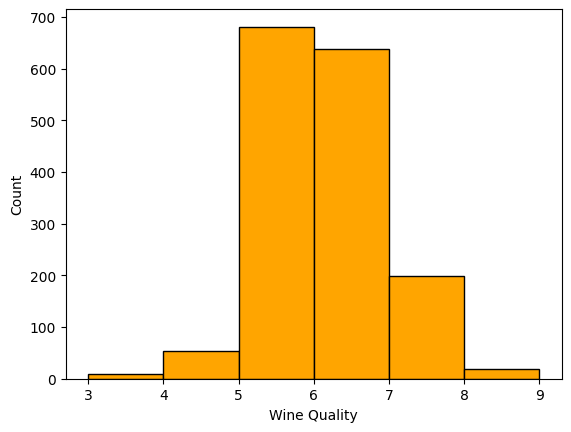

In [11]:
plt.hist(data.quality,bins = [x for x in range(3,10)],edgecolor='black',color ='Orange',align ='mid')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

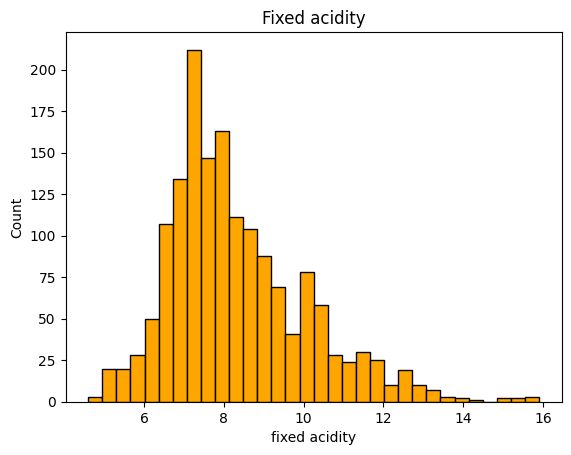

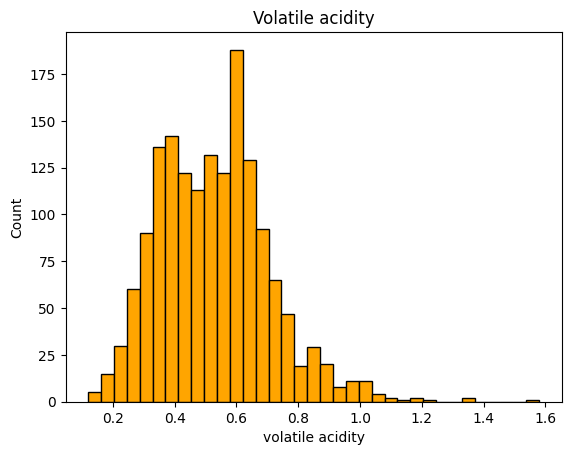

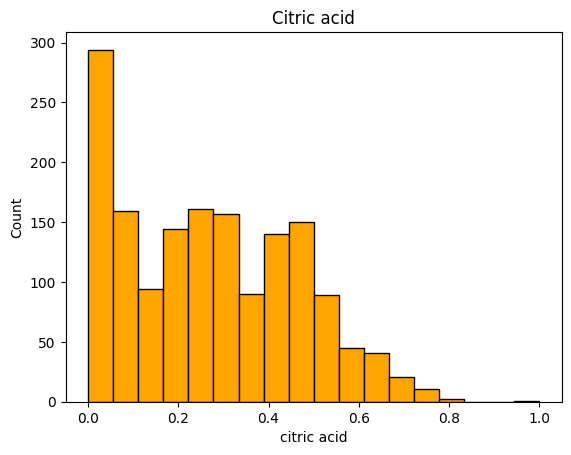

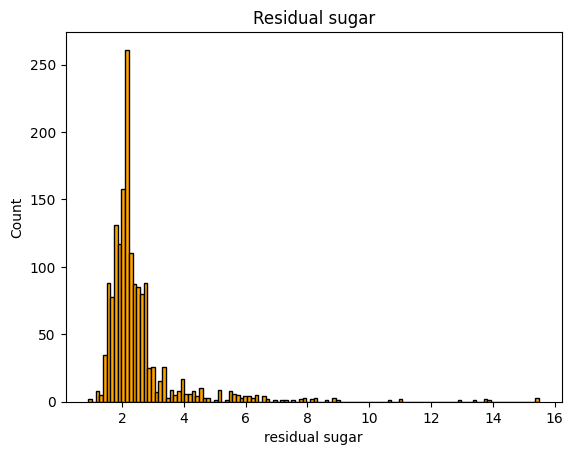

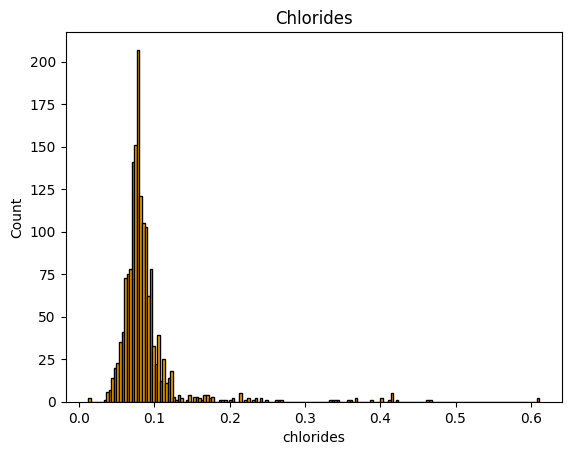

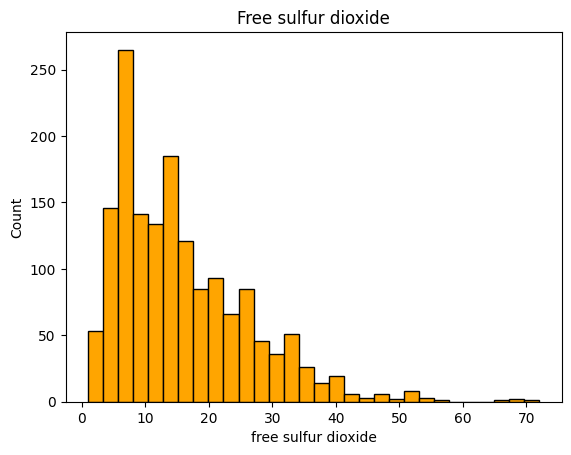

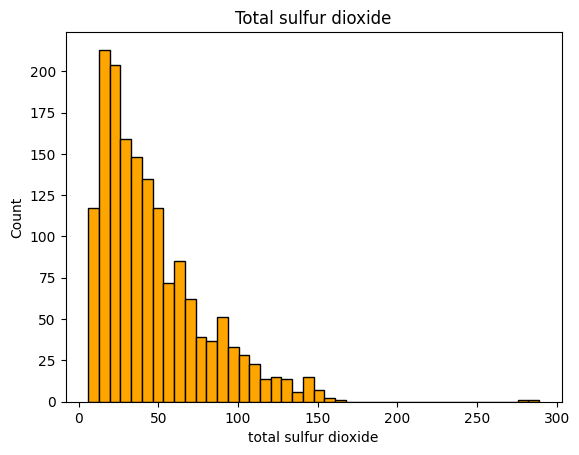

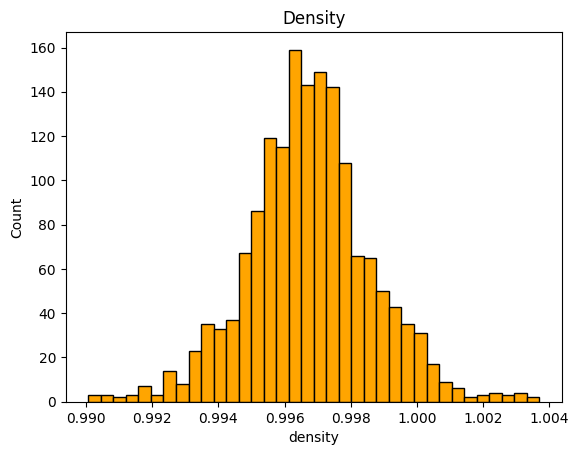

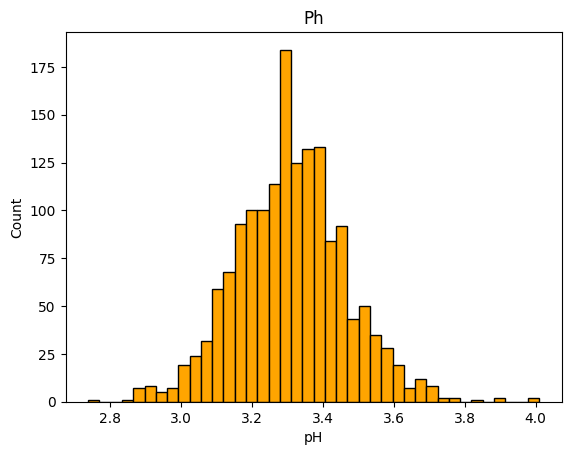

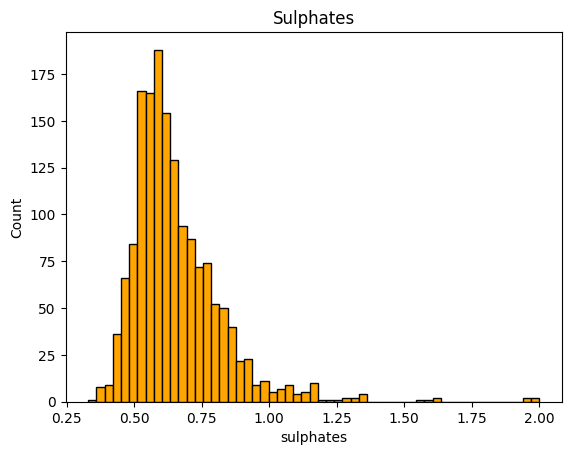

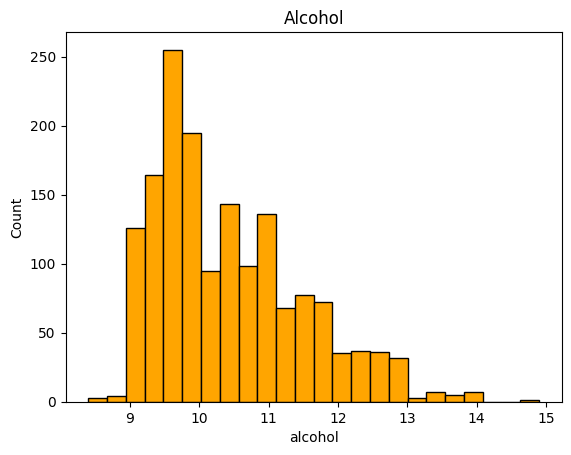

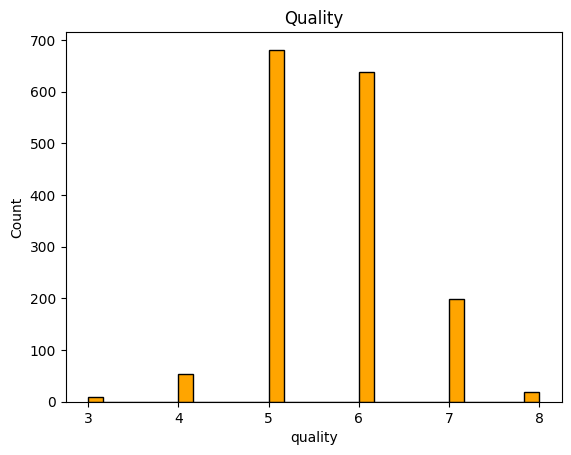

In [12]:
for i in data.columns.unique():
    plt.hist(data[i],bins = "auto",edgecolor='black',color ='Orange',align ='mid')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i.capitalize())
    plt.show()

### Few observations based on these plots
1. Features are at different scales
2. Features have different distributions
    * A few are tail heavy, eg - residual sugar,free S02
    * A few have multiple modes, eg - volatile acdity,citric acid

Before any further exploration, its a good idea to separate test set and do not look at it in order to have a clear evaluation set.

### Create a test set
* When we look at test set, we are likely to notice patterns in that and based on that we may select certain models.
* This leads to biased estimation on test set, which may not generalize well in practice. This is called ***data snooping bias***.

In [13]:
"""Lets write a funtion to split the data into training and test. make sure to set the seed so that we get the same test set in the next run"""
def split_train_test(data,test_ratio):
    #set the random seed
    np.random.seed(42)
    
    #shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    
    #calculate the size of test set
    test_set_size = int(len(data) * test_ratio)
    
    #Split the dataset to get traing and test sets
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(data,0.2)

Scikit-learn provides a few functions for creating test sets based on :
1. ***Random Sampling*** which randomly selects k% points in the test set
2. ***Stratified Sampling*** which samples test examples such that they are representative of overall distribution

### Random Sampling
* train_test_split() function performs random sampling with
    - random_state parameter to set the random seed,which ensures that the same examples are selected for test sets across runs
    - test_size parameter for specifying size of the test set
    - shuffle flag to specify if the data needs to be shuffled before splitting

* Provision for processing multiple datasets with an identical number of rows and selecting the same indices from these datasets.
    - Useful when labels(dependent or y values)  and features(independent or x values) are in different dataframe. 


In [15]:
from sklearn.model_selection import train_test_split

The "?" function opens up the documentation for any built-in function of any library

In [16]:
?train_test_split 

In [17]:
train_set,test_set = train_test_split(data,test_size=0.2,random_state = 42)

### Note : the function that was manually created above by us **split_train_test()** performs the same function as **train_test_split()**

## Stratified Sampling
So whenever the data distribution may not be uniform in real world data, we use stratified sampling

- Random sampling - by its nature-introduces biases in such data sets.
Recall the label  distribution in our dataset, its not uniform !
We saw in the data.quality histogram that the labels 5 and 6 are over-represented in the dataset and rest are under-represented in the dataset.
So the distribution of label is not uniform and this could be a problem for random sampling.The test distribution may not match with the overall distribution.

### How do we sample in such cases?
* We divide the population into homogeneous groups called strata.
* Data is sampled from each stratum so as to match it with the overall data distribution
* SK-Learn provided a class ***StratifiedShuffleSplit*** that helps us in stratified sampling

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
# ?StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1,test_size = 0.2,random_state=42)
for train_index,test_index in split.split(np.zeros(len(data)),data['quality']):
#     print("TRAIN:", train_index, "TEST:", test_index)
    
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    

Lets examine the test set distribution by the wine quality that was used for stratified sampling

In [20]:
strat_dist = strat_test_set['quality'].value_counts()/len(strat_test_set)

Now compare this with overall distribution

In [21]:
overall_dist = data.quality.value_counts()/len(data)

In [22]:
dist_comparison = pd.DataFrame({'overall':overall_dist,'stratified':strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_percentage'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [23]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_percentage
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [24]:
random_dist = test_set.quality.value_counts()/len(test_set)
dist_comparison['random_dist'] = random_dist
dist_comparison['diff(r-o)']  = dist_comparison['random_dist'] - dist_comparison['overall']
dist_comparison['diff(r-o)_percentage'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])

### Sampling bias comparison
Compare the difference in distribution of stratified and uniform sampling :
* Stratified sampling gives us test distribution closer to the overall distribution than the random sampling.

In [25]:
dist_comparison.loc[:,['diff(s-o)_percentage','diff(r-o)_percentage']]


,diff(s-o)_percentage,diff(r-o)_percentage
5,-0.209251,-4.611784
6,0.250784,3.383621
7,0.439698,5.461683
4,3.708726,-5.719340
8,-16.718750,38.802083
3,-0.062500,-50.031250




### Step 3 : Data Visualization

* Performed on training set
* In case of large training set
    1. We usually sample examples to form exploration set
    
    
- Enables to understand features and their relationships among themselves and with output label

In our case, we have small training data and we use it all for data exploration.There is no need to create a separate exploration set

Its a good idea to create a copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.

In [26]:
exp_data = strat_train_set.copy() # Copy of our training set

### a) Using Matplotlib

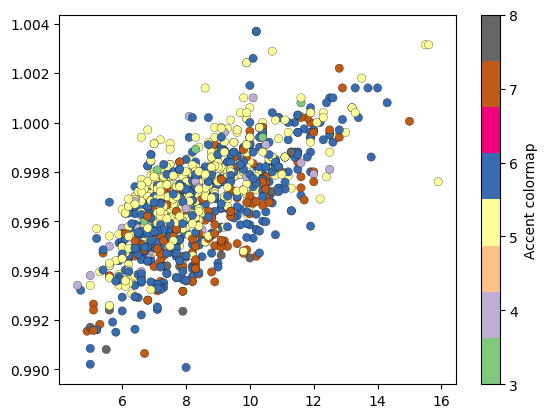

In [27]:
#Way to visualize individual or combination of features

plt.scatter(exp_data['fixed acidity'], exp_data["density"],c = exp_data.quality,cmap="Accent",edgecolors="Black",linewidths=0.2)
plt.colorbar().set_label("Accent colormap")

### b) Using Seaborn

<AxesSubplot: xlabel='fixed acidity', ylabel='density'>

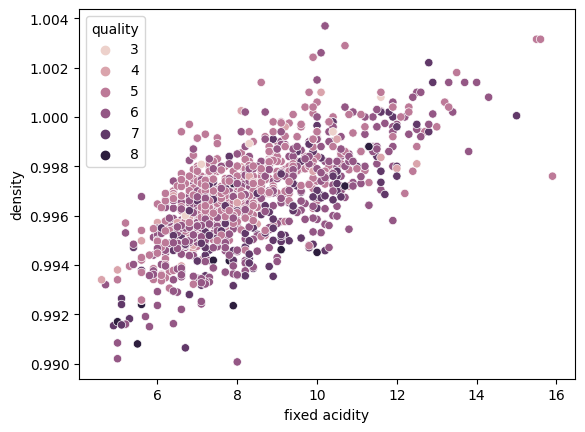

In [28]:
sns.scatterplot(x='fixed acidity', y ='density', hue = 'quality',data = exp_data)

The scatterplot above clearly conveys that 5 and 6 quality wines are most present

## Relationship between features 

- **Standard correlation coefficient** between features.
    - Ranges between  -1 to 1

- Visualization with a **heat map** 
  
- But there is a limitation with standard correlation coefficient that it only captures linear relationship b/w features.
    - For non-linear relationships, use **Rank correlation**

In [29]:
# Lets check the correlation between our features
corr_matrix = exp_data.corr()  

In [30]:
# Lets check the features that are correlated with our label "quality"
corr_matrix["quality"]

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

Notice that **quality** has strong positive correlation with **alcohol** and strong negative correlation with **volatile acidity** 

<AxesSubplot: >

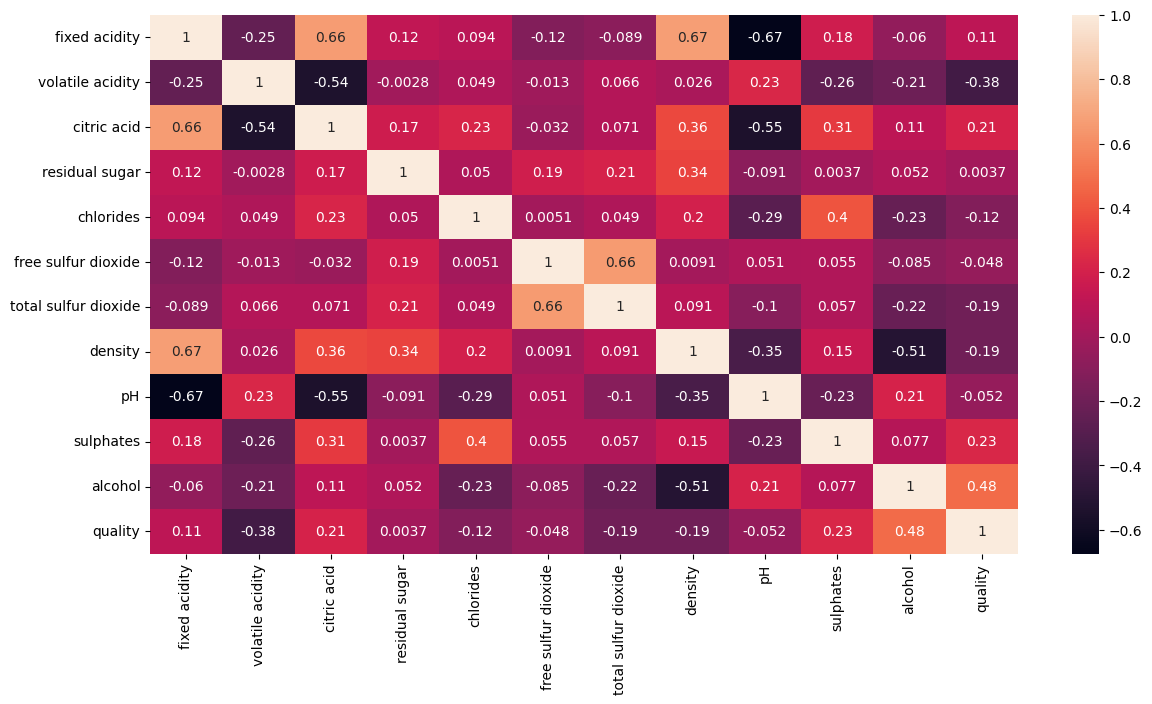

In [31]:
# Lets visualize this using heatmap
plt.figure(figsize =(14,7))
sns.heatmap(corr_matrix,annot = True )

#### Few observations are :
- Clearly citric acid and fixed acidity have strong +ve correlation
- ph and fixed acidity have strong -ve correlation

array([[<AxesSubplot: xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot: xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot: xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot: xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot: xlabel='quality', ylabel='citric acid'>],
       [<AxesSubplot: xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot: xlabel='pH', ylabel='pH'>,
        <AxesSubplot: xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot: xlabel='sulphates', ylabel='pH'>,
        <AxesSubplot: xlabel='quality', ylabel='pH'>],
       [<AxesSubplot: xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot: xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot: xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot: xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot: xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot: xlabel='citric acid', ylabel='sulphates'>,
        <AxesSubplot: xlabel='pH', ylabel='sulpha

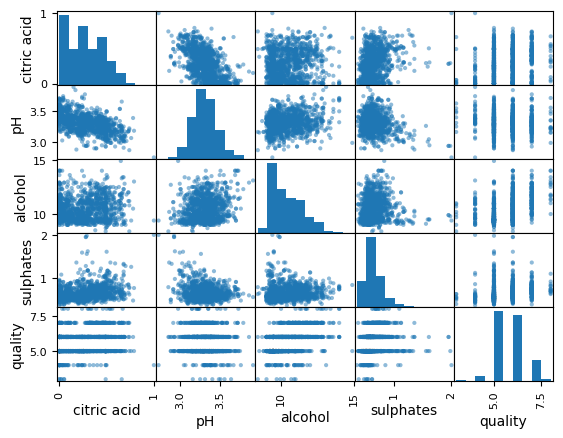

In [32]:
#We can also use scatter matrix method from pandas plotting library
from pandas.plotting import scatter_matrix
attributes = ['citric acid','pH','alcohol','sulphates','quality']
scatter_matrix(exp_data[attributes])

### Note of wisdom
1. Visualization and data exploration do not have to be absolutely thorough
2. Objective is to get quick insight into features and its relationship with other features
3. Exploration is an iterative process; Once we build model and obtain more insights, we can come back to this step

### Step 4 : Prepare data for ML algorithm
We often need to preprocess the data before using it for model building due to a variety of reasons :
   1. Due to errors in data capture, data may contain outliers or missing values. (Imagine there is a sensor measuring wine quality in this case and if it starts malfunctioning, we might see different values than otherwise would have received.
2. Different features may of be of different scales.
3. The current data distribution is not exactly amenable(possible to control) to learning

Typical steps in data preprocessing are as follows:
1. Separate features and labels
2. Handling missing values and outliers
3. Feature scaling to bring all features on the same scale
4. Applying certain transformations like log,square root on the features

Its a good practice to make a copy of the data and apply preprocessing on that copy. This ensures that in case something goes wrong, we will at least have original copy of the data intact

#### 4.1 Separate features and labels from the training set

In [33]:
#Copy all features leaving the label aside
wine_features = strat_train_set.drop("quality", axis = 1)

# Copy the label list
wine_label = strat_train_set['quality'].copy()
wine_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1542,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1558,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
924,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
971,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1056,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1394,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
539,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


#### 4.2 Data Cleaning
Let's first check if there are any missing values in the feature data set

In [34]:
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

According to the above table, there are no missing values

##### In case, we have non-zero numbers in any columns in the above table, we have a problem of missing values
- These values are missing due to errors in recording data or they do not exists
- If they are not recorded
    - Use imputation technique to fill up the missing values
    - Drop the rows containing missing vaues
- If they do not exists, it is better to keep it as NaN

Sklearn provides a couple of methods to drop rows containing the missing values:
- dropna()
- drop()
- It also provides **SimpleImputer** class for filling up the missing values, say median value or mean or min or max depending upon the context of problem.

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
?SimpleImputer

The strategy contaings instructions as how to replace the missing values. In this case, we specify that the missing value should be replaced by the median value.

In [36]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In case, if any of the features contains non-numeric attributes, they need to be dropped before calling the fit method on imputer object.

Let's check the statistics learnt by the imputer on the training set

In [37]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

Here are the median values of all features in the dataset.We can cross check it by calculating median value on feature set:

In [38]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

Finally we use the trained imputer to transform the training set such that the missing values are replaced by the medians:

In [39]:
transformed_features = imputer.transform(wine_features)

This returns a numpy array and we can convert it to a dataframe if needed

In [40]:
transformed_features.shape

(1279, 11)

In [41]:
wine_features_tr = pd.DataFrame(transformed_features, columns = wine_features.columns.unique())
wine_features_tr.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
5,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.99810,3.11,0.97,10.10
6,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.40
7,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.50


**Since we didn't had any missing or Nan value in our dataset, it remains unchanged but this method is very usefull when dealing with missing values**

#### 4.3 Handling text and categorical attributes
Sometimes we might have text or categorical features in our dataset and we require special handling measures to use them in our ML algorithms since they prefer numerical data, so using special methods, we convert them into numbers

 **4.3.1 Converting categories into numbers**
   - Using **OrdinalEncoder()**

In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()


Call **fit_transform()** method on **OrdinalEncoder** to convert text into numbers.

The list of categories can be obtained via **categories_instance** variable.

One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than the distinct ones since it uses Ordinal Encoding, and that would be a problem if there is no systematic ordering in the categories

In [43]:
ordinal_encoder.fit_transform(wine_features)

array([[ 20., 105.,   2., ...,  40.,  17.,  29.],
       [ 22.,  60.,  33., ...,  32.,  17.,  11.],
       [ 72.,  48.,  50., ...,  22.,  39.,  28.],
       ...,
       [ 31.,  32.,  32., ...,  41.,  25.,  23.],
       [ 65.,  40.,  73., ...,  32.,  23.,  35.],
       [ 40.,  31.,  45., ...,  43.,  38.,  44.]])

#### It is advised to give "categories" as argument during ordinal encoding of the features unique elements otherwise, it will randomly assign any value to without taking into account the order of those elements.
For ex - If we have some column "Rank" containing values [First,second,third] 
then it is advised to create an object as 
ord_obj = OrdinalEncoder(categories = [First,second,third]) so first will acquire 0 as value, second will acquire 2 as value and third will acquire 3 as value.

#### 4.3.2 Using One hot encoding
- Here we create one binary feature per category - the feature value is 1 when the category is present else it is 0
- Only one feature is 1(hot) and the rest are 0(cold).
- The new features are refered to as *_dummy features_*
- Scikit Learn provides **OneHotEncoder** class to convert the categorical values to One-hot vectors

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encod = OneHotEncoder()
# ?OneHotEncoder

- We need to call **fit_transform()** method on OneHotEncoder object
- The output is a Scipy sparse matrix rather than Numpy array. This enables us to save space when we have huge number of categories
- In case we want to convert it to dense representation, we can do so using toarray() method
- The list of categories can be obtained via categories_ instance variable (Ex - cat_encod.category_)

***Basically what it does is, it takes all the unique values of a feature, creates new individual column of that value and if that particular value is present in the respective particular row in the orginal dataset then it will gain the value 1 otherwise 0.***

Say you have some feature icecream with value [chocolate,vanilla,strawberry] in a dataset of 10 rows, then three columns of same name will be created and they acquire value 1 or 0 in accordance with their presence in that particular row in the original dataset.

1. As we observed that when the number of categories are very large, the one-hot encoding would result in a very large number of features.
2. This can be addressed with one of the following approaches:
    - Replace one-hot encoding representaion with categorical numerical features
    - **Convert into low-dimensional learnable vectors called embeddings**

#### 4.4 Feature Scaling
  - Most ML algorithms do not perform well when input features are on very different scales.
  - **Scaling of target label is generally not required**
  
      ##### 4.5.1 Min-Max Scaling or Normalization
      1. We subtract the minimum value of a feature from the current value and divide it by the difference between the minimum and the maximum value of that feature.
      2. Values are shifted and scaled so that they range between 0 and 1.
      3. SK-Learn provides **MinMaxScalar** transformer for this.
      4. One can specify hyperparameter **feature_range** to specify the range of the feature.
      
      ##### 4.5.2 Standardization
      1. We subtract the mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
      2. While ***Normalization*** bounds the values between 0 and 1, ***Standardization*** does not bound values to a specific range.
      3. Standardization is less affected by the outliers as compared to normalization
      4. Sk-Learn provides **StandardScalar** transformation for feature standardization.
      
**Note that all these transformations are learnt on the training data and then applied on the training and test data to transform them.**
Remember that we should apply the same kind of transformation to training and test data in order to have the correct machine learning pipeline. This makes sure that we are applying same kind of transformation as we apply on the training set. 

**We never learn these transformers on the full data set.**

### Transformation Pipeline
* Scikit-Learn provides a Pipeline class to line up transformations in an intended order.
* Here is an example :

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
transform_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('st_scaler',StandardScaler()),])

wine_features_tr = transform_pipeline.fit_transform(wine_features)
dtb = pd.DataFrame(wine_features_tr,columns = wine_features.columns.unique())
dtb.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.947970,1.840385,-1.303102,-0.468011,-0.489279,1.229496,-0.278517,-1.088491,-0.056651,-0.581493,0.305611
1,-0.829952,0.573783,0.288062,3.022496,2.866207,4.763582,2.032285,0.612906,-0.584565,-0.581493,-0.867817
2,2.120487,0.236023,1.160636,0.041022,-0.136070,-0.967369,-0.458580,2.087450,-1.244458,0.652447,0.258674
3,0.173197,-0.326911,-0.019905,-0.177135,-0.665884,-0.203242,-0.578622,-0.850836,-0.848522,0.764623,0.728045
4,1.235355,-1.509072,1.057980,-0.468011,-0.450034,-0.967369,-1.118809,0.272626,0.141317,1.157240,0.446422
5,1.884452,-1.283899,1.673915,-0.395292,-0.430411,-0.394274,-0.608632,0.737135,-1.310447,1.718122,-0.304571
6,-0.180856,1.221157,1.468603,-0.395292,0.570348,1.325012,2.602484,0.034971,-0.452586,-0.020611,-0.961691
7,-0.888961,0.461196,-1.200446,-0.758886,-0.626639,-1.062885,-1.118809,-0.802225,0.735221,-0.357140,-0.867817
8,-1.420040,0.123436,-0.892479,-0.249854,-0.528525,2.184654,0.111618,-0.872441,1.395114,0.540271,0.728045
9,0.114188,-1.959419,1.211964,-0.577089,-0.351920,2.757749,1.222004,-0.807626,0.141317,0.540271,1.291290


In [49]:
# Try calculating variance as it should be 1 after standardizing
#dtb['var']  = pow((dtb['fixed acidity'].mean() - dtb['fixed acidity']),2)
#p = dtb['var'].sum()/(len(dtb['var']))
#p

np.var(dtb['fixed acidity'])

1.0

 Let's understand what is happening in the above statement
   - ***Pipeline*** has a sequence of transformations - missing value imputation followed by standardization
   - Each step in the sequence is defined by ***name, estimator*** pair.
   - Each name should be unique and **should not contain __(double underscore)**
   
- The output of one step is passed on the next one in sequence until it reaches the last step.
    -. *Here the pipeline first performs imputation of missing values and its result is passed for standardization*
    
- The pipeline exposes the same method as the final estimator (final ML algorithm)
    - Here StandardScaler is the last estimator and since it is a transformer, we call fit_transform() method on the **Pipeline** object

**How to transform mixed features ?**

 1. The real world data has both categorical and numerical features and we need to apply different transformations to them.
 2. Scikit-Learn introduced ***ColumnTransformer*** for this purpose.

In [50]:
from sklearn.compose import ColumnTransformer

In our current dataset, we do not have any categorical feature, all are numerical

For the illustration purpose, here is an example code snippet:

In [ ]:
num_attribs = list(wine_features.columns)
cat_attribs = ['place_of_manufacturing']

full_pipeline = ColumnTransformer ([
    ('num',transform_pipeline,num_attribs),
    ('Cat',OneHotEncoder(),cat_attribs)
])

wine_features_tr = full_pipeline.fit_transform(wine_features)

# We are not going to run this since the categorical variable that we specified above doesn't exists in our training data

1. The ***ColumnTransformer*** applies each transformation to the appropriate columns and then concatenates the output along the columns.
2. Note that all transformers must return the same number of rows
3. The numeric transformers return dense matrix while the categorical ones return sparse matrix. The **ColumnTransformer** automatically determines the type of output based on the density of the resulting matrix.

### Step 5 : Select and train ML Model
1. It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

#### LinearRegression Model

In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr,wine_label)

LinearRegression()

Now that we have a working model of a regression,let's evaluate performance of the model on the training as well as test sets:
- For regression models, we use mean squared error as an evaluationn measure.

In [51]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
print(quality_predictions)
print('\n')
print('wine_label\n',wine_label)

mean_squared_error(wine_label, quality_predictions)

[5.50831104 5.04077727 5.83997956 ... 5.7334289  5.877007   6.34831723]


wine_label
 1542    6
1558    5
344     6
924     5
971     6
       ..
1056    7
1394    5
337     5
539     5
1083    6
Name: quality, Length: 1279, dtype: int64


0.4206571060060278

 Let's Evaluate performance on the test set
   - We need to first apply transformation on the test set annd then apply the model prediction function

In [52]:
#copy all features leaving aside the label
wine_features_test = strat_test_set.drop('quality',axis =1)

# copy the label list
wine_label_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict method and calculate MSE(mean squared error)
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test,quality_test_predictions)

0.39759130875015186

Let's visualize the error between the actual and predicted values

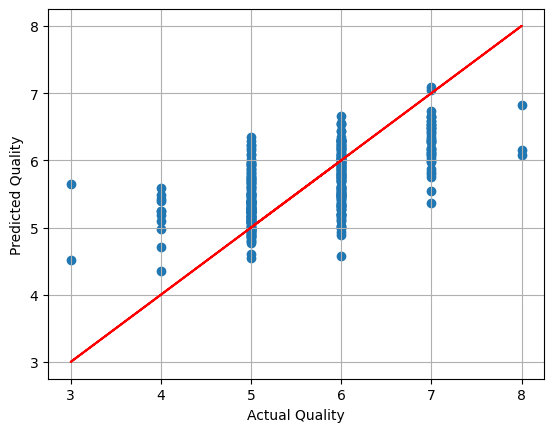

In [53]:
plt.scatter(wine_label_test,quality_test_predictions)
plt.plot(wine_label_test,wine_label_test,'r-')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.grid()

### The model seems to be making errors on the best and poor quality wines, so at the extremes the model is not performing well while it is doing good for avg quality wines 

 #### DecisionTreeRegressor Model

Let's try another model.
Since we have a quick baseline, we can try to other regressor models and try to build other regressor models.
For out second ML model, we have picked ***DecisionTreeRegressor***

In [54]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr,wine_label)

DecisionTreeRegressor()

In [55]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_label,quality_predictions)

0.0

In [56]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test,quality_test_predictions)

0.58125

**Note that the training error is 0 while the test error is 0.58. This is an example of an ***Overfitted Model***.**

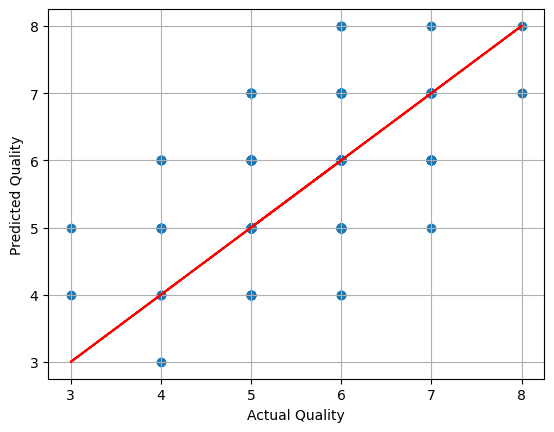

In [57]:
# Now let's plot the graph to see the actual vs predicted quality

plt.scatter(wine_label_test,quality_test_predictions)
plt.plot(wine_label_test,wine_label_test,'r-')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.grid()

We can use **Cross-Validation (CV)** for robust evaluation of our model performance.

In [58]:
from sklearn.model_selection import cross_val_score
?cross_val_score

- Cross Validation provides a separate MSE(Mean Squared Error) for each validation set (k folds), which we can use to get a mean estimation of MSE as well as the standard deviation, which help us to determine how precise our estimation is.

- The additional cost we pay in Cross Validation is additional training runs, which may be too expensive in certain cases.

Basically what cross validation does is, when you give the parameter CV an int value(called k value for k-Folds,default is 5) inside cross_val_score algorithm, it divides the dataset into that k folds and select each fold at once as the test set and rest as the training set and applying the ML algorithm K-1 times to each fold and returns a score based on the method prescibed in the scoring parameter inside cross_val_score along with its mean and std_dev

In [59]:
# First we will create a simple function to display scores of the applied algorithms

def display_scores(score):
    print("Scores :",score)
    print("Mean :",score.mean())
    print("Standard Deviation :",score.std())

##### Linear Regression CV

In [60]:
score = cross_val_score(lin_reg,wine_features_tr,wine_label,scoring = 'neg_mean_squared_error',cv= 10)
lin_reg_mse_score = -score
display_scores(lin_reg_mse_score)

Scores : [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean : 0.4316392172121959
Standard Deviation : 0.08356359730413965


##### Decision Tree Regressor CV

In [61]:
score = cross_val_score(tree_reg,wine_features_tr,wine_label,scoring = 'neg_mean_squared_error',cv= 10)
tree_mse_score = -score
display_scores(tree_mse_score)

Scores : [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
Mean : 0.6852177657480315
Standard Deviation : 0.16668343331737054


Let's compare these scores of linearRegression and DecisionTreeRegressor
   - Linear Reg has better (or lower) MSE than the decision tree regressor

#### Random Forest Model
- Random forest model builds multiple decision trees on randomly selected features and then averages their predictions
- Building a model on top of other model is called **Ensemble Learning**, which is often used to improve performance of ML model

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr,wine_label)

# RANDOM FOREST CV

score = cross_val_score(forest_reg,wine_features_tr,wine_label,scoring = 'neg_mean_squared_error',cv = 10)
forest_mse_scores = -score
display_scores(forest_mse_scores)

Scores : [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
Mean : 0.34565226131889765
Standard Deviation : 0.0736322184302973


We can also calculate the mean squared error on the test sets

In [63]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test,quality_test_predictions)

0.34449875

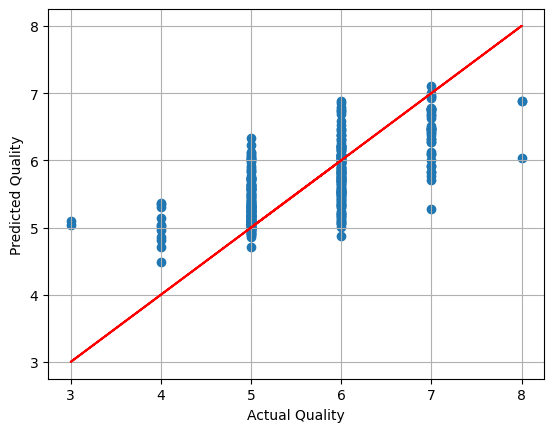

In [64]:
# Now let's plot the graph to see the actual vs predicted quality

plt.scatter(wine_label_test,quality_test_predictions)
plt.plot(wine_label_test,wine_label_test,'r-')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.grid()

Clearly Random Forest shows more promising results than the other two regression models
   - Its a good practice to build a few such models without tuning their hyperparameters and shortlist a few promising models among them
   - Also saves the model to the disk in Python pickle format

#### What to do next ?

We have to check for model diagnostics
1. Underfitting - Remedies are :
   1. Models with more capacity.
   2. Less constraints/Regularization

<br>

2. Overfitting - Remedies are :
    1. More data
    2. Simpler Model
    3. More constraints/Regularization

### Step 6 : Finetuning our Model
1. Usually there are a number of hyperparameters in the ML model, which are set manually by the ML model developer
2. Tuning these hyperparameters lead to better accuracy of ML model
3. However, finding the best combination of hyperparameters in a brute force manner is a challenging task.It is a search problem in the space of hyperparameters, which is huge.

Fortunately we have a couple of ways in which we can perform this activity SKlearn package.
#### Grid Search
* Scikit-Learn provives a class `GridSearchCV` that helps us in this pursuit.

In [66]:
from sklearn.model_selection import GridSearchCV

*  We need to specify a list of hyperparameters along with the range of values to try.
*  It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

For example, there are number of hyperparameters in `RandomForest` regression such as:
* Number of estimators
* Maximum number of features

In [67]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

Here the parameter grid contains two combinations:
1. The first combination contains **`n_estimators`** with 3 values and **`max_features`** with 4 values.
2. The second combination has an additional **`bootstrap`** parameter, which is set to **`False`**.  Note that it was set to its default value, which is **`True`**, in the first grid.

Let's compute the total combinations evaluated here:
1. The first one results in $3 \times 4 = 12$ combinations.
2. The second one has 2 values of **`n_estimators`** and 3 values of **`max_features`**, thus resulting in total of $2 \times 3 = 6$ values.

The total number of combinations evaluated by the parameter grid $= 12 + 6 = 18$.

#### Let's create an object of `GridSearchCV`:

In [68]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

*  In this case, we set `cv=5` i.e. using 5 fold cross validation for training the model.
*  We need to train the model for 18 parameter combinations and each combination would be trained 5 times as we are using cross-validation here.
*  The total model training runs = $18 \times 5 = 90$. 

#### Let's launch the hyperparameter search:

In [69]:
grid_search.fit(wine_features_tr, wine_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best parameter combination can be obtained as follows:

In [70]:
 grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Let's find out the error at different parameter settings:

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

As you can notice the lowest MSE is obtained for the best parameter combination.

Let's obtain the best estimator as follows:

In [72]:
 grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

**Note**: `GridSearchCV` is initialized with `refit=True` option, which retrains the best estimator on the full training set.  This is likely to lead us to a better model as it is trained on a larger dataset.  

#### [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

*  When we have a large hyperparameter space, it is desirable to try `RandomizedSearchCV`.
*  It selects a random value for each hyperparameter at the start of each iteration and repeats the process for the given number of random combinations.
*  It enables us to search hyperparameter space with appropriate budget control.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Analysis of best model and its errors

Analysis of the model provides useful insights about features.  let's obtain the feature importance as learnt by the model:

In [ ]:
 feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
sorted(zip(feature_importances, feature_list), reverse=True)

[(0.2486711653610271, 'alcohol'),
 (0.14163642739406354, 'sulphates'),
 (0.12665569639367016, 'volatile acidity'),
 (0.08045272518319231, 'total sulfur dioxide'),
 (0.07275072016325315, 'density'),
 (0.05822554296729619, 'citric acid'),
 (0.05791188978825248, 'chlorides'),
 (0.057124416693656116, 'pH'),
 (0.056416454671447944, 'residual sugar'),
 (0.05388861091468478, 'fixed acidity'),
 (0.04626635046945642, 'free sulfur dioxide')]

Based on this information, we may drop features that are not so important. 

It is also useful to analyze the errors in prediction and understand its causes and fix them.

#### Evaluation on test set

Now that we have a reasonable model, we evaluate its performance on the test set.  The following steps are involved in the process:
1. Transform the test features.

In [ ]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the test set.

In [ ]:
quality_test_predictions = grid_search.best_estimator_.predict(
    wine_features_test_tr)

3.  Compare the predicted labels with the actual ones and report the evaluation metrics.

In [ ]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.35345138888888883

4.  It's a good idea to get $95\%$ confidence interval of the evaluation metric.  It can be obtained by the following code:

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, len(squared_errors) - 1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(0.29159276569581916, 0.4153100120819586)

# Step 7: Present your solution

Once we have satisfactory model based on its performance on the test set, we reach the prelaunch phase.  

Before launch, 
1. We need to present our solution that highlights learnings, assumptions and systems limitation.
2. Document everything, create clear visualizations and present the model. 
3. In case, the model does not work better than the experts, it may still be a good idea to launch it and free up bandwidths of human experts.

# Step 8: Launch, monitor and maintain your system

#### Launch
* Plug in input sources and 
* Write test cases

#### Monitoring

* System outages
* Degradation of model performance
* Sampling predictions for human evaluation
* Regular assessment of data quality, which is critical for model performance

#### Maintainance

* Train model regularly every fixed interval with fresh data.
* Production roll out of the model.

# Summary

In this module, we studied steps involved in end to end machine learning project with an example of prediction of wine quality.  